Find out the salaries of 2 people who have:
- 2 year experience
- 9 test score
- 6 interview score

and

- 12 year experience
- 10 test score
- 10 interview score

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [3]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [5]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.experience = df.experience.apply(w2n.word_to_num)

In [7]:
test_score_median = df["test_score(out of 10)"].median()
test_score_median

8.0

In [8]:
interview_score_median = df["interview_score(out of 10)"].median()
interview_score_median

7.5

In [9]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(test_score_median)
df["interview_score(out of 10)"]=df["interview_score(out of 10)"].fillna(interview_score_median)

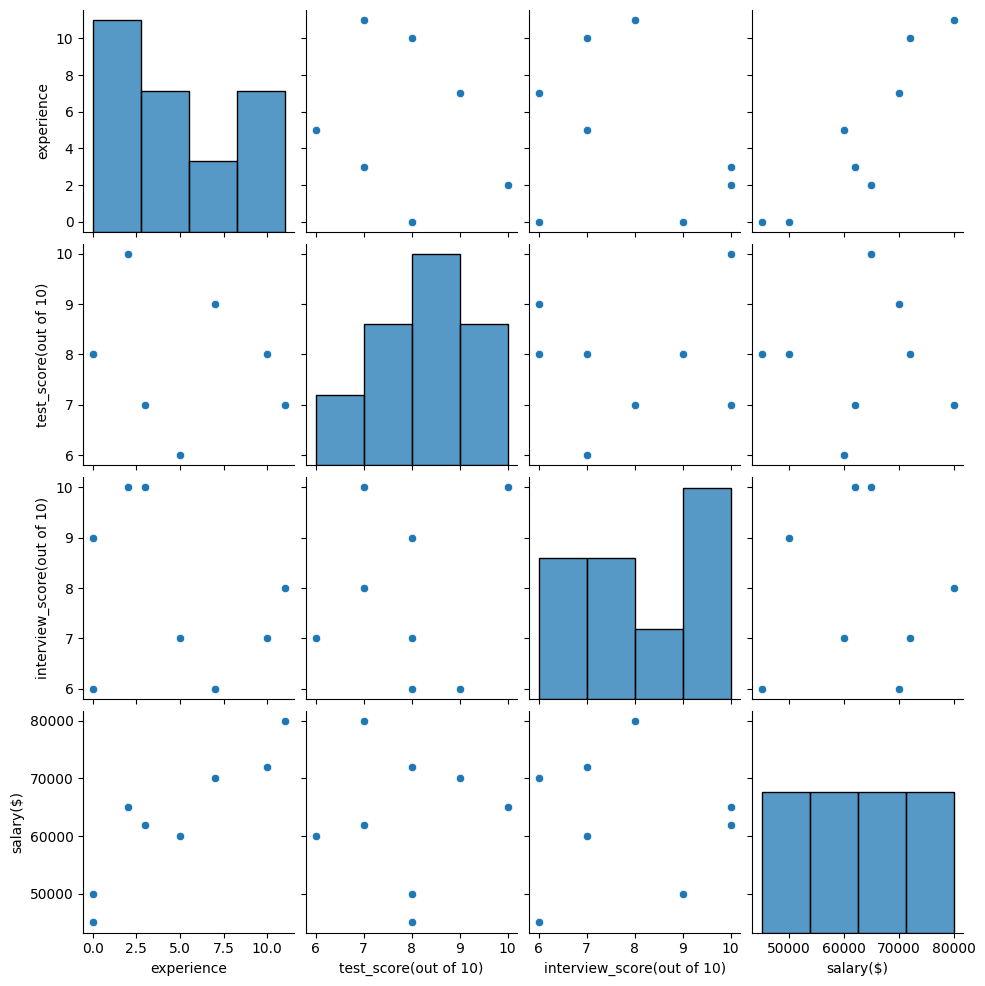

In [10]:
sns.pairplot(df)

<AxesSubplot: >

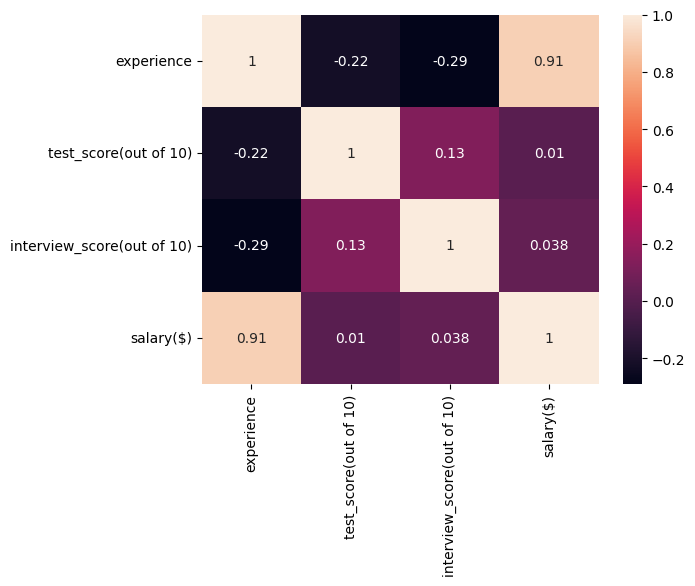

In [11]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='experience', ylabel='salary($)'>

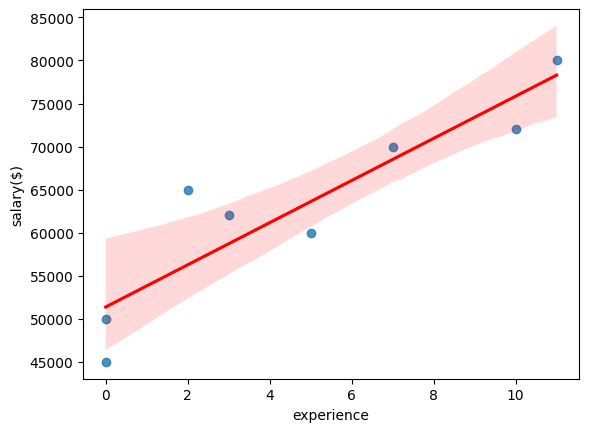

In [12]:
sns.regplot(data=df, x=df["experience"], y=df["salary($)"], line_kws=dict(color="red"))

In [13]:
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df["salary($)"]

In [14]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [15]:
model.predict([[2,9,6]])

c:\Users\Salih Furkan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [16]:
model.predict([[12,10,10]])

c:\Users\Salih Furkan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])